<a href="https://colab.research.google.com/github/Saeif-Saleh/AppPortfolio/blob/master/Copy_of_Classify_different_antennas_900_245.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi
# !pip install --upgrade tensorflow


Tue Mar  3 01:19:16 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import scipy.io
import numpy as np

In [0]:
matlab_data=scipy.io.loadmat('/content/drive/My Drive/thesis_data/R900_245_4.mat')

In [221]:
print(list(matlab_data.keys())[3:])

['R900_T2450_test', 'R900_T2450_train', 'R900_T500_test', 'R900_T500_train', 'R900_T900_test', 'R900_T900_train', 'R900_lime_test', 'R900_lime_train']


In [0]:
train_900=matlab_data['R900_T900_train']
train_2450=matlab_data['R900_T2450_train']
train_500=matlab_data['R900_T500_train']


In [229]:
print(train_900.shape)
print(train_2450.shape)
print(train_500.shape)

(79094137, 2)
(78204989, 2)
(80362202, 2)


In [0]:
test_900=matlab_data['R900_T900_test']
test_2450=matlab_data['R900_T2450_test']
test_500=matlab_data['R900_T500_test']


In [231]:
print(test_900.shape)
print(test_2450.shape)
print(test_500.shape)

(15015082, 2)
(16076593, 2)
(15449600, 2)


In [232]:
print(train_900.shape)
print(train_2450.shape)
print(train_500.shape)

(79094137, 2)
(78204989, 2)
(80362202, 2)


In [0]:
#Slicing data to be divisible by 2**n 
# train_900=train_900[1000000:5194304]
# train_2450=train_2450[1000000:5194304]
# train_500=train_500[1000000:5194304]

train_900=train_900[1000000:34554432]
train_2450=train_2450[1000000:34554432]
train_500=train_500[1000000:34554432]






In [0]:
test_900=test_900[1000000:9388608]
test_2450=test_2450[1000000:9388608]
test_500=test_500[1000000:9388608]



In [235]:
#Concatenate training and test data
train_x=np.concatenate((train_900,train_2450,train_500),axis=0)
test_x=np.concatenate((test_900,test_2450,test_500),axis=0)
print(train_x.shape)
print(test_x.shape)


(100663296, 2)
(25165824, 2)


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers

In [0]:
n_classes=3
sample_size=128

In [0]:
train_x=train_x.reshape(-1,2,sample_size)
test_x=test_x.reshape(-1,2,sample_size)

In [0]:
#Creating train_y
train_y=np.zeros(len(train_x))
seprator=int(len(train_y)/n_classes)
train_y[0:seprator]=0
train_y[seprator:2*seprator]=1
train_y[2*seprator:3*seprator]=2
# train_y[3*seprator:]=3
#Creating test_y
test_y=np.zeros(len(test_x))
seprator=int(len(test_y)/n_classes)
test_y[0:seprator]=0
test_y[seprator:2*seprator]=1
test_y[2*seprator:3*seprator]=2
# test_y[3*seprator:]=3


In [0]:
train_y=tf.keras.utils.to_categorical(
    train_y,
    num_classes=n_classes,
    dtype='float32'
)
test_y=tf.keras.utils.to_categorical(
    test_y,
    num_classes=n_classes,
    dtype='float32'
)

In [241]:
print(train_x.shape)
print(train_y.shape)

(786432, 2, 128)
(786432, 3)


In [0]:
img_rows=sample_size
img_cols=2
train_x = train_x.reshape(-1, img_rows, img_cols, 1)
test_x=test_x.reshape(-1,img_rows,img_cols,1)
input_shape = (img_rows, img_cols, 1)

In [243]:
print(input_shape)
print(train_x.shape)
print(train_y.shape)

(128, 2, 1)
(786432, 128, 2, 1)
(786432, 3)


In [0]:
from sklearn.model_selection import train_test_split


train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.20, shuffle= True)


In [245]:
   conv_model = tf.keras.models.Sequential()
#convolutional layer with rectified linear unit activation
   conv_model.add(tf.keras.layers.Conv2D(128, kernel_size=(1, 2),
                 activation='relu',padding="same",kernel_regularizer=regularizers.l2(0.0001),
                 input_shape=input_shape))

   conv_model.add(tf.keras.layers.Conv2D(64, (1, 2), padding="same",activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
  #  conv_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

   conv_model.add(tf.keras.layers.Conv2D(32, (1, 2), padding="same",activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
  #  conv_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


   
   

   conv_model.add(tf.keras.layers.Flatten())
#fully connected to get all relevant data
   conv_model.add(tf.keras.layers.Dense(256, activation='relu'))
   conv_model.add(tf.keras.layers.Dropout(0.5))
   conv_model.add(tf.keras.layers.Dense(80, activation='relu'))
#one more dropout for convergence' sake :) 
   conv_model.add(tf.keras.layers.Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
   conv_model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))
   conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
   conv_model.summary()




	 

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 128, 2, 128)       384       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 128, 2, 64)        16448     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 128, 2, 32)        4128      
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_28 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 80)               

In [0]:

conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history=conv_model.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=5,shuffle=True)

Train on 1258291 samples, validate on 314573 samples
Epoch 1/5
1258291/1258291 [==============================] - 213s 169us/sample - loss: 0.3060 - acc: 0.8749 - val_loss: 0.2003 - val_acc: 0.9188
Epoch 2/5
1258291/1258291 [==============================] - 213s 169us/sample - loss: 0.2266 - acc: 0.9120 - val_loss: 0.1806 - val_acc: 0.9298
Epoch 3/5
1258291/1258291 [==============================] - 212s 168us/sample - loss: 0.2111 - acc: 0.9194 - val_loss: 0.1633 - val_acc: 0.9388
Epoch 4/5
1258291/1258291 [==============================] - 212s 169us/sample - loss: 0.2028 - acc: 0.9240 - val_loss: 0.1756 - val_acc: 0.9334
Epoch 5/5
1258291/1258291 [==============================] - 211s 168us/sample - loss: 0.1966 - acc: 0.9269 - val_loss: 0.1576 - val_acc: 0.9414


In [0]:
def create_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.BatchNormalization(input_shape=input_shape))
  model.add(tf.keras.layers.Conv2D(64, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization(input_shape=input_shape))
  model.add(tf.keras.layers.Conv2D(128, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization(input_shape=input_shape))
  model.add(tf.keras.layers.Conv2D(256, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256))
  model.add(tf.keras.layers.Activation('elu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(3))
  model.add(tf.keras.layers.Activation('softmax'))
  return model

In [249]:
conv_model=create_model()
conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history=conv_model.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=2,shuffle=True)

Train on 629145 samples, validate on 157287 samples
Epoch 1/2
629145/629145 [==============================] - 177s 281us/sample - loss: 0.3024 - acc: 0.8687 - val_loss: 0.1666 - val_acc: 0.9253
Epoch 2/2
629145/629145 [==============================] - 175s 278us/sample - loss: 0.2519 - acc: 0.9028 - val_loss: 0.3189 - val_acc: 0.9230


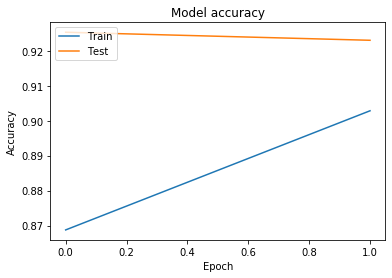

In [250]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

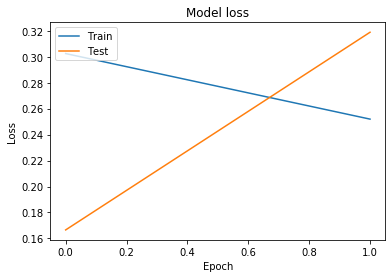

In [251]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
from sklearn.metrics import classification_report, confusion_matrix


In [253]:
conv_model.evaluate(test_x,test_y)

196608/196608 [==============================] - 18s 92us/sample - loss: 7.4314 - acc: 0.7713


[7.4314235012776715, 0.771342]

In [0]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [0]:
y_pred=conv_model.predict(test_x)

In [0]:
matrix = confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))


Figure(720x504)


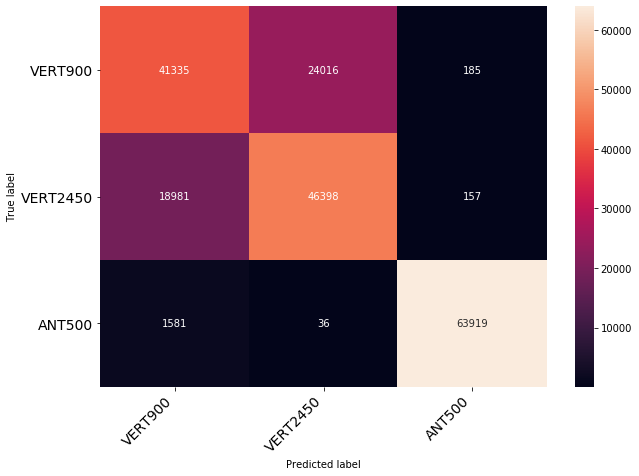

In [257]:
print(print_confusion_matrix(matrix,['VERT900','VERT2450','ANT500']))